In [264]:
from sklearn.feature_extraction.text import CountVectorizer

In [265]:
v = CountVectorizer()
v.fit(['Thor Hathoawala is looking for a job'])
v.vocabulary_

{'thor': 5, 'hathoawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [266]:
# using bi_gram and tri_gram

In [267]:
v = CountVectorizer(ngram_range=(1,2))
                                # 1 = BOW , 2 = bi_gram
v.fit(['Thor Hathoawala is looking for a job'])
v.vocabulary_

{'thor': 9,
 'hathoawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathoawala': 10,
 'hathoawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [268]:
import spacy

In [269]:
corpus = [
    'Thor ate pizza',
    'Loki is tall',
    'Loki is eating pizza'
]

In [270]:
# load english language model and create nlp object from it.
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return ' '.join(filtered_token)

preprocess('Loki is eating pizza')

'Loki eat pizza'

In [271]:
corpus_preprocessed = [preprocess(text) for text in corpus]

corpus_preprocessed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [272]:
# text preprocessing shows vocaburary word with vectors
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_preprocessed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [273]:
# text we want to copare with vocabilary
# see the text and copare with vocaburay and it convert it into the vector
# comparision happend along with vocab index

v.transform(['ram eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [274]:
# solving news categorical problem using N_gram

In [275]:
import pandas as pd

In [276]:
df =  pd.read_json('news_dataset.json')

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [277]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [278]:
# see in values counts having imblanced data 
# under sampling techniques for handling imblanced data: randomely choose equal data.
min_samples = 1381
df_business = df[df.category=='BUSINESS'].sample(min_samples, random_state=2020)
df_SPORTS = df[df.category=='SPORTS'].sample(min_samples, random_state=2020)
df_CRIME = df[df.category=='CRIME'].sample(min_samples, random_state=2020)
df_SCIENCE = df[df.category=='SCIENCE'].sample(min_samples, random_state=2020)

In [279]:
df_balanced = pd.concat([df_business,df_SPORTS,df_CRIME,df_SCIENCE], axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [280]:
df_balanced.head()

,text,category
4144,Long Island Iced Tea Corp's Shares Skyrocket A...,BUSINESS
7833,High-Paying Job Listings Are Written To Attrac...,BUSINESS
442,Now We Know Why Huge TPP Trade Deal Is Kept Se...,BUSINESS
3435,Why This Preschool Just Wrote Goldman Sachs A ...,BUSINESS
3478,The Term 'Black Friday' Has Lost All Meaning,BUSINESS


In [281]:
# we can also used pandas replace method..

target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [282]:
df_balenced.category.value_counts()

category
0    1381
1    1381
2    1381
3    1381
Name: count, dtype: int64

In [283]:
df_balanced.shape

(5524, 3)

In [284]:
df_balanced.head()

,text,category,category_num
4144,Long Island Iced Tea Corp's Shares Skyrocket A...,BUSINESS,0
7833,High-Paying Job Listings Are Written To Attrac...,BUSINESS,0
442,Now We Know Why Huge TPP Trade Deal Is Kept Se...,BUSINESS,0
3435,Why This Preschool Just Wrote Goldman Sachs A ...,BUSINESS,0
3478,The Term 'Black Friday' Has Lost All Meaning,BUSINESS,0


In [285]:
# train our model.
X = df_balanced.text
y = df_balanced.category_num
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
df_balenced.shape

(5524, 2)

In [287]:
print(X_train.shape)
X_train.head()

(4419,)


2279     Alaska Iditarod Musher Recounts Horrific Train...
4651     Oklahoma Woman Who Married Her Mother Pleads G...
11069    Volkswagen Confirms $4.3 Billion U.S. Settleme...
5392     How to Really Connect With Customers To click ...
3659     A Day in the Life of a Field Biologist: The It...
Name: text, dtype: object

In [288]:
y_train.value_counts()

category_num
2    1131
1    1111
3    1094
0    1083
Name: count, dtype: int64

# preprocessing done 
# apply pipeline

# use 1 gram(Bag of word)

In [289]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('CountVectorizer', CountVectorizer(ngram_range=(1,1))),
    ('naive MB', MultinomialNB())
])
clf.fit(X_train,y_train)


Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('naive MB', MultinomialNB())])

In [290]:
prediction = clf.predict(X_test)

In [291]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       298
           1       0.93      0.86      0.89       270
           2       0.85      0.88      0.86       250
           3       0.92      0.83      0.87       287

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [292]:
X_test[:5]

2695     British Gymnast Louis Smith Gets A Perfect 10 ...
10811    Will Amelia Earhart Help Unlock Secrets of Cli...
12432    The New York Post Just Sank Ryan Lochte "Liar,...
5864           Mysterious Light Seen Near Huge Black Hole 
1203     WATCH: New NFL Dad Celebrates Fatherhood In Th...
Name: text, dtype: object

In [293]:
y_test[:5]

2695     1
10811    3
12432    1
5864     3
1203     1
Name: category_num, dtype: int64

# 1 gram and bi_gram

In [294]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('CountVectorizer', CountVectorizer(ngram_range=(1,2))),
    ('naive MB', MultinomialNB())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('naive MB', MultinomialNB())])

In [295]:
# for watvhing vocabulary..
v = CountVectorizer()
v.fit_transform(X_train.values)

<4419x13802 sparse matrix of type '<class 'numpy.int64'>'
	with 91919 stored elements in Compressed Sparse Row format>

In [296]:
v.vocabulary_

{'alaska': 546,
 'iditarod': 6069,
 'musher': 8065,
 'recounts': 10024,
 'horrific': 5912,
 'training': 12683,
 'run': 10633,
 'collision': 2499,
 'with': 13605,
 'suv': 12113,
 'when': 13499,
 'an': 681,
 'slammed': 11316,
 'into': 6425,
 'karin': 6727,
 'hendrickson': 5739,
 'four': 4966,
 'wheeler': 13498,
 'tuesday': 12823,
 'evening': 4328,
 'she': 11073,
 'was': 13388,
 'thrown': 12489,
 'the': 12402,
 'air': 523,
 'and': 695,
 'her': 5743,
 'dogs': 3708,
 'ran': 9877,
 'from': 5041,
 'scene': 10789,
 'of': 8480,
 'accident': 312,
 'landed': 6896,
 'in': 6162,
 'ditch': 3664,
 'about': 276,
 '20': 80,
 'feet': 4646,
 'away': 1087,
 'then': 12416,
 'began': 1293,
 'making': 7392,
 'phone': 9096,
 'calls': 1901,
 'oklahoma': 8515,
 'woman': 13619,
 'who': 13521,
 'married': 7497,
 'mother': 7987,
 'pleads': 9234,
 'guilty': 5487,
 'to': 12558,
 'incest': 6179,
 'previously': 9495,
 'another': 737,
 'child': 2237,
 'biological': 1434,
 'son': 11491,
 'volkswagen': 13295,
 'confirms'

In [297]:
prediction = clf.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       298
           1       0.93      0.80      0.86       270
           2       0.86      0.86      0.86       250
           3       0.92      0.77      0.84       287

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [298]:
# similary used tri_gram with 1 gram or bi_gram

In [299]:
X_test[:5]

2695     British Gymnast Louis Smith Gets A Perfect 10 ...
10811    Will Amelia Earhart Help Unlock Secrets of Cli...
12432    The New York Post Just Sank Ryan Lochte "Liar,...
5864           Mysterious Light Seen Near Huge Black Hole 
1203     WATCH: New NFL Dad Celebrates Fatherhood In Th...
Name: text, dtype: object

In [300]:
y_test[:5]

2695     1
10811    3
12432    1
5864     3
1203     1
Name: category_num, dtype: int64

In [301]:
prediction[:5]

array([1, 3, 1, 3, 1], dtype=int64)

In [302]:
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

# some preprocess using lemmatization

see the accuracy with preprocessed text

In [303]:
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return ' '.join(filtered_token)

In [304]:
df_balanced['preprocessed_text'] = df_balanced.text.apply(preprocess)

In [305]:
df_balanced.head()

,text,category,category_num,preprocessed_text
4144,Long Island Iced Tea Corp's Shares Skyrocket A...,BUSINESS,0,Long Island Iced Tea Corp share Skyrocket rena...
7833,High-Paying Job Listings Are Written To Attrac...,BUSINESS,0,High pay Job Listings write Attract men Study ...
442,Now We Know Why Huge TPP Trade Deal Is Kept Se...,BUSINESS,0,know huge TPP Trade Deal keep secret Public ke...
3435,Why This Preschool Just Wrote Goldman Sachs A ...,BUSINESS,0,Preschool Wrote Goldman Sachs check company he...
3478,The Term 'Black Friday' Has Lost All Meaning,BUSINESS,0,Term Black Friday lose Meaning


In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X = df_balanced.preprocessed_text
y = df_balanced.category_num
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
X_train.shape, X_test.shape

((4419,), (1105,))

In [311]:
y_train.shape, y_test.shape

((4419,), (1105,))

In [308]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('CountVectorizer', CountVectorizer(ngram_range=(1,2))),
    ('naive MB', MultinomialNB())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('naive MB', MultinomialNB())])

In [312]:
prediction = clf.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       298
           1       0.92      0.89      0.90       270
           2       0.83      0.93      0.88       250
           3       0.93      0.84      0.88       287

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [314]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[262,  11,  15,  10],
       [  8, 239,  19,   4],
       [ 13,   2, 232,   3],
       [ 28,   7,  12, 240]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

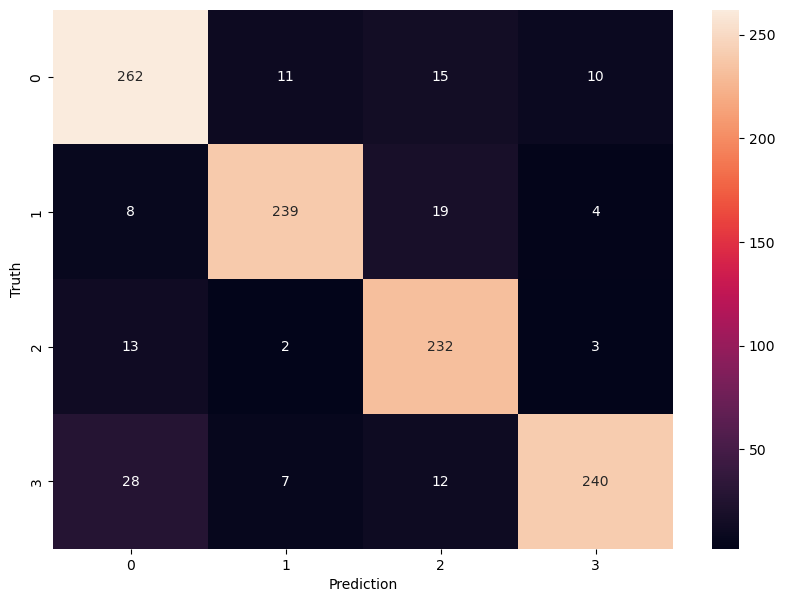

In [315]:

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')